## Notebook 02 - EDA

In [4]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sys
sys.path.append('../src')
from paths import TRANSFORMED_DATA_DIR

#Automcomplete
%config IPCompleter.greedy=True

In [5]:
# Load the dataset
data_quality = pd.read_csv(TRANSFORMED_DATA_DIR / 'data_quality.csv')

In [6]:
data_quality 

,week,date,day,home,score,away,xG,xG_1,venue,referee
0,1,2018-08-17,Fri,Girona,0–0,Valladolid,0.7,0.0,Estadi Municipal de Montilivi,Guillermo Cuadra
1,1,2018-08-17,Fri,Betis,0–3,Levante,0.9,2.5,Estadio Benito Villamarín,Ignacio Iglesias
2,1,2018-08-18,Sat,Celta Vigo,1–1,Espanyol,0.6,0.6,Estadio de Balaídos,Santiago Jaime
3,1,2018-08-18,Sat,Villarreal,1–2,Real Sociedad,1.6,0.7,Estadio de la Cerámica,Mario Melero
4,1,2018-08-18,Sat,Barcelona,3–0,Alavés,3.2,0.3,Camp Nou,José Sánchez
...,...,...,...,...,...,...,...,...,...,...
2275,38,2024-05-25,Sat,Real Madrid,0–0,Betis,1.0,0.7,Estadio Santiago Bernabéu,Isidro Díaz de Mera
2276,38,2024-05-26,Sun,Getafe,1–2,Mallorca,0.9,1.4,Coliseum Alfonso Pérez,Víctor García
2277,38,2024-05-26,Sun,Las Palmas,1–1,Alavés,1.0,2.5,Estadio de Gran Canaria,Francisco Hernández
2278,38,2024-05-26,Sun,Celta Vigo,2–2,Valencia,1.5,2.0,Estadio Abanca Balaídos,Miguel Ángel Ortiz Arias


### Analyze the numeric values

In [7]:
# Filter a new dataframe with those two numeric values
num_values = data_quality[['xG', 'xG_1']]
num_values

,xG,xG_1
0,0.7,0.0
1,0.9,2.5
2,0.6,0.6
3,1.6,0.7
4,3.2,0.3
...,...,...
2275,1.0,0.7
2276,0.9,1.4
2277,1.0,2.5
2278,1.5,2.0


In [8]:
# Create a function for stastiscal analysis
def continuous_statistics(num_values):
    """
    Calculate and return statistical summaries for continuous variables.
    
    Parameters:
    - num_values: The DataFrame containing continuous variables (Pandas DataFrame).
    
    Returns:
    - A DataFrame with statistical summaries including the median (Pandas DataFrame).
    """
    # Describe
    statistics = num_values.describe().T
    # Add the median
    statistics['median'] = num_values.median()
    # Reorder columns to place the median next to the mean
    statistics = statistics.iloc[:, [0, 1, 8, 2, 3, 4, 5, 6, 7]]
    # Return the result
    return statistics


In [9]:
continuous_statistics(num_values)

,count,mean,median,std,min,25%,50%,75%,max
xG,2280.0,1.441053,1.3,0.792167,0.1,0.9,1.3,1.9,5.3
xG_1,2280.0,1.108377,1.0,0.698821,0.0,0.6,1.0,1.5,4.9


#### Statistical summary

Home teams generally have higher expected goals (xG) compared to away teams (xG_1). Here are some key observations to support this interpretation. Let's explain some of those values:

**Higher mean and median**

The average xG for home teams is 1.44, while the average xG_1 for away teams is 1.11. The median xG for home teams is 1.3, compared to a median xG_1 of 1.0 for away teams. Suggesting that, on average, home teams are expected to score more goals than away teams in a match.

**Greater variability**

The standard deviation of xG for home teams is 0.79, whereas it is 0.70 for away teams. This tells us that the expected goals for home teams are more spread out around the mean compared to away teams, suggesting higher variability in the performance of home teams.

**Broader range of values**

The maximum xG for home teams is 5.3, while the maximum xG_1 for away teams is 4.9. The minimum xG for home teams is 0.1, compared to 0.0 for away teams. The range of xG values for home teams (5.3) is broader than the range of xG_1 values for away teams (4.9), further indicating a wider spread of performance outcomes for home teams.

**Percentiles**

At the 25th percentile, home teams have an xG of 0.9, while away teams have an xG_1 of 0.6. At the 75th percentile, home teams have an xG of 1.9, compared to an xG_1 of 1.5 for away teams. These percentile values highlight that home teams consistently have higher expected goals across the distribution.

In [10]:
def eda_continuous_plots(num_values):
    """
    Generate EDA plots for continuous variables.
    
    Parameters:
    - num: The DataFrame containing continuous variables (Pandas DataFrame).
    
    Returns:
    - None
    """
    # Calculate the number of rows needed
    from math import ceil
    rows = ceil(num_values.shape[1] / 2)

    # Define the plot
    f, ax = plt.subplots(nrows=rows, ncols=2, figsize=(16, rows * 6))

    # Flatten to iterate through the plot as if it were 1-dimensional instead of 2-dimensional
    ax = ax.flat 

    # Create a loop that adds plots
    for idx, variable in enumerate(num_values):
        num_values[variable].plot.density(ax=ax[idx])
        ax[idx].set_title(variable, fontsize=12, fontweight="bold")
        ax[idx].tick_params(labelsize=12)

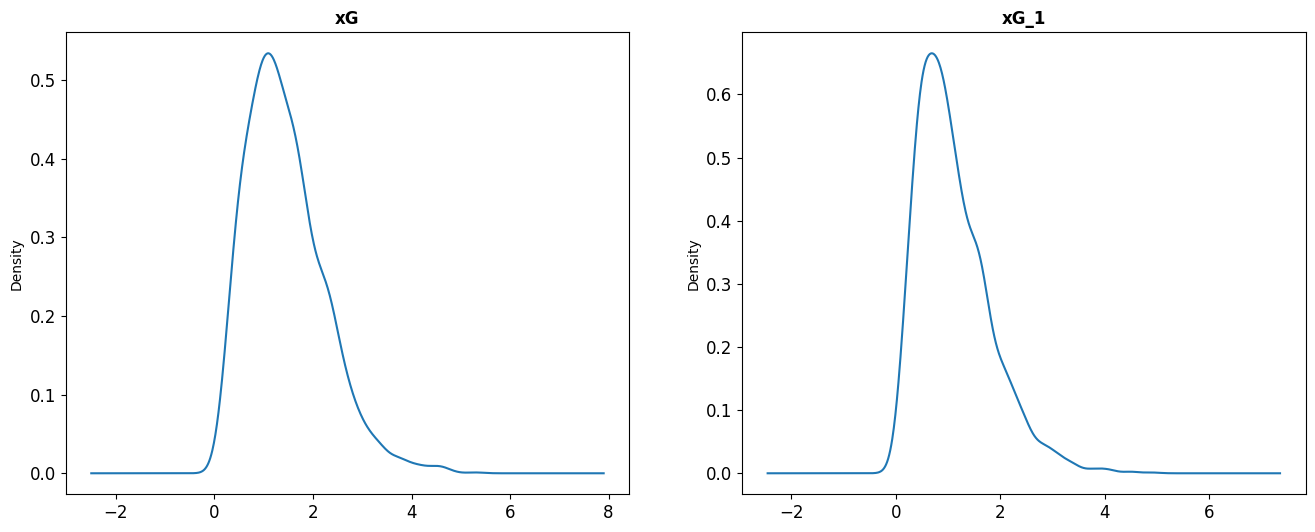

In [11]:
eda_continuous_plots(num_values)

### Distribution plots analysis

**1. Distribution Shape**

Both distributions show a single peak, indicating they might be unimodal. The shape of both distributions is right-skewed. The long tail on the right side suggests that there are some matches with very high xG values, though these are less frequent.

**2. Central Tendency**

The peak of both distributions is around the lower xG values, which means that the majority of matches have lower xG values. It xG's peak appears to be slightly higher than the peak for xG_1, indicating that home teams might generally have slightly higher xG values compared to away teams.

**3. Spread**

The spread of xG values is wider compared to xG_1, suggesting more variability in xG values for the home team. Both distributions have values ranging from slightly below 0 to about 8, but the density falls off more rapidly for xG_1 than for xG.

**4. Potential Outliers**

There might be some potential outliers on the right side of the distribution, where xG and xG_1 values are high but the density is very low.

### **Conclusions**

The analysis of the statistical summary and distribution plots provides strong evidence for the home advantage in football matches. 

Home teams not only have higher average and median xG values but also exhibit greater variability and a broader range of performance outcomes. 

This supports the idea that playing at home offers teams a significant competitive edge, leading to better overall performance. 

As we continue to develop and refine predictive models for football/soccer match outcomes, accounting for the home advantage will be crucial in improving the accuracy and reliability of these models.